<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">

</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала. Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий

# <center> Занятие 1. Библиотеки и инструменты для анализа данных
## <center> Практическое задание. Анализ данных пассажиров "Титаника"

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/forms/D8RdSNG48gkkKZ8C3).**

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [3]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [5]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [7]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [8]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [9]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [10]:
age_categories = [age_category(age) for age in data.Age]

In [76]:
data['Age_category'] = age_categories
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age_category'],
      dtype='object')

**Другой способ – через `apply`.**

In [12]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [21]:
# Ваш код здесь
print(len(data[data.Sex == 'male']), 'man and', len(data[data.Sex == 'female']), 'women')

577 man and 314 women


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [46]:
# Ваш код здесь
data.head()
print('m&f', data.Pclass.mean())
print('m', data[data.Sex == 'male'].Pclass.mean())
print('f', data[data.Sex == 'female'].Pclass.mean())
print('2-nd class males', len(data[(data.Sex == 'male') & (data.Pclass == 2)]))

m&f 2.308641975308642
m 2.389948006932409
f 2.159235668789809
2-nd class males 108


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [60]:
# Ваш код здесь
print('median of Fare', round(data.Fare.median(),2))
print('std of Fare', round(data.Fare.std(),2))

median of Fare 14.45
std of Fare 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [73]:
# Ваш код здесь
less30 = len(data[data.Age < 30])
less30survived = len(data[(data.Age < 30) & (data.Survived == 1)])
more60 = len(data[data.Age > 60])
more60survived = len(data[(data.Age > 60) & (data.Survived == 1)])

print(round(less30survived * 100 / less30 ,1), '% young and', round(more60survived * 100 / more60 ,1), '% old')


40.6 % young and 22.7 % old


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [74]:
# Ваш код здесь
# Ваш код здесь
male = len(data[data.Sex == 'male'])
malesurvived = len(data[(data.Sex == 'male') & (data.Survived == 1)])
female = len(data[data.Sex == 'female'])
femalesurvived = len(data[(data.Sex == 'female') & (data.Survived == 1)])

print(round(malesurvived * 100 / male ,1), '% male and', round(femalesurvived * 100 / female ,1), '% female')


18.9 % male and 74.2 % female


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [140]:
# Ваш код здесь

def shortName(name):
    div = name.split('.')[0].split(', ')[-1]
    shortNameAndSurName = name.split(div + '. ')[1].split(' ')
    return shortNameAndSurName[0];
data['ShortName'] = data['Name'].apply(shortName)
g = data[data.Sex == 'male'].groupby('ShortName')
nameDF = pd.DataFrame([], columns=['name', 'count'])

for (i, sub_df) in g:
    df2 = pd.DataFrame([[i, len(sub_df)]], columns=['name', 'count'])
    nameDF = nameDF.append(df2)
nameDF.sort_values(by='count', 
        ascending = False).head()

,name,count
0,William,35
0,John,25
0,George,14
0,Charles,13
0,Thomas,13


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

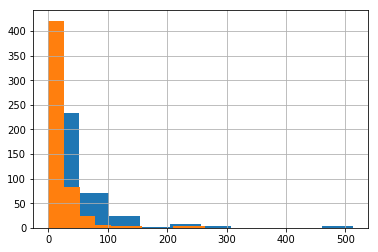

In [146]:
# Ваш код здесь
data[data.Survived == 1].Fare.hist()
data[data.Survived == 0].Fare.hist()


In [150]:
print('survived age mean', data[data.Survived == 1].Age.mean())
print('not survived age mean', data[data.Survived == 0].Age.mean())

survived age mean 28.343689655172415
not survived age mean 30.62617924528302


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [170]:
# Ваш код здесь
print('- В среднем мужчины 1-го класса старше 40 лет:', data[(data.Pclass == 1) & (data.Sex == 'male')].Age.mean() > 40)
print('- их средний возраст:', data[(data.Pclass == 1) & (data.Sex == 'male')].Age.mean())

print('- В среднем женщины 1-го класса старше 40 лет', data[(data.Pclass == 1) & (data.Sex == 'female')].Age.mean() > 40)
print('- их средний возраст:', data[(data.Pclass == 1) & (data.Sex == 'female')].Age.mean())

print('====================')

g = data.groupby('Pclass')
for (i, sub_df) in g:
    print('Мужчины', i, 'класса со средним возрастом', round(sub_df[sub_df.Sex == 'male'].Age.mean()), ', женщины - ', round(sub_df[sub_df.Sex == 'female'].Age.mean()))
    
print('====================')

g = data.groupby('Pclass')
for (i, sub_df) in g:
    print('Средний восзраст в классе', i, ':', round(sub_df.Age.mean()))


- В среднем мужчины 1-го класса старше 40 лет: True
- их средний возраст: 41.28138613861386
- В среднем женщины 1-го класса старше 40 лет False
- их средний возраст: 34.61176470588235
Мужчины 1 класса со средним возрастом 41.0 , женщины -  35.0
Мужчины 2 класса со средним возрастом 31.0 , женщины -  29.0
Мужчины 3 класса со средним возрастом 27.0 , женщины -  22.0
Средний восзраст в классе 1 : 38.0
Средний восзраст в классе 2 : 30.0
Средний восзраст в классе 3 : 25.0


In [151]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,ShortName
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Owen
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,John
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Jacques
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,William
